COLLAB lINK: "https://colab.research.google.com/drive/1bG5m83bNF5wU-1yxa6fJ_Yo2T3XKkQ_N#scrollTo=x0ABE9v9g1H7"


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler


random.seed(1)
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv(f'/content/drive/MyDrive/Applied Data Mining/completedata.csv')

In [4]:
data.describe()

,Age,AnyHealthcare,AtLeastOneDrinkPerWeekOrMonth,AvgDrinkPerDayInLastMonth,BMI,CholCheck,CoronaryHeartDisease,Diabetes,DrinkOccasionsPerDay,DrinksPerWeek,...,HvyAlcoholConsump,Income,MentHlth,NoDocbcCost,PhysActivity,PhysHlth,Sex,Smoker,State,Stroke
count,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000,...,476586.000000,476586.000000,476586.000000,476586.00000,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000,476586.000000
mean,7.533259,0.936442,175.294782,2.067524,27.518536,0.957487,1.970880,0.182309,643.644354,9366.288435,...,0.735168,6.447071,2.767952,0.08483,0.812657,2.939948,0.479649,0.482987,29.056846,0.025357
std,3.024103,0.243965,49.331076,2.056059,5.698650,0.201756,0.367614,0.562883,396.075209,12396.334980,...,0.441244,1.854286,6.711563,0.27863,0.390187,7.125419,0.499586,0.499711,15.142291,0.157208
min,1.000000,0.000000,101.000000,1.000000,12.000000,0.000000,1.000000,0.000000,3.000000,23.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,1.000000,105.000000,1.000000,24.000000,1.000000,2.000000,0.000000,71.000000,933.000000,...,0.000000,6.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,8.000000,1.000000,202.000000,2.000000,27.000000,1.000000,2.000000,0.000000,900.000000,6300.000000,...,1.000000,7.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,27.000000,0.000000
75%,10.000000,1.000000,206.000000,2.000000,30.000000,1.000000,2.000000,0.000000,900.000000,12600.000000,...,1.000000,8.000000,2.000000,0.00000,1.000000,2.000000,1.000000,1.000000,40.000000,0.000000
max,13.000000,1.000000,260.000000,76.000000,98.000000,1.000000,9.000000,2.000000,900.000000,478800.000000,...,1.000000,8.000000,30.000000,1.00000,1.000000,30.000000,1.000000,1.000000,72.000000,1.000000


In [5]:
data.isnull().sum()

Age                              0
AnyHealthcare                    0
AtLeastOneDrinkPerWeekOrMonth    0
AvgDrinkPerDayInLastMonth        0
BMI                              0
CholCheck                        0
CoronaryHeartDisease             0
Diabetes                         0
DrinkOccasionsPerDay             0
DrinksPerWeek                    0
Education                        0
GenHlth                          0
HeartAttack                      0
HeartDiseaseorAttack             0
HighBP                           0
HighChol                         0
HvyAlcoholConsump                0
Income                           0
MentHlth                         0
NoDocbcCost                      0
PhysActivity                     0
PhysHlth                         0
Sex                              0
Smoker                           0
State                            0
Stroke                           0
dtype: int64

In [6]:
data.shape

(476586, 26)

Exploratory Data Analysis¶


In [8]:
data['HeartDiseaseorAttack'].unique()

array([0., 1.])

In [7]:
data.columns

Index(['Age', 'AnyHealthcare', 'AtLeastOneDrinkPerWeekOrMonth',
       'AvgDrinkPerDayInLastMonth', 'BMI', 'CholCheck', 'CoronaryHeartDisease',
       'Diabetes', 'DrinkOccasionsPerDay', 'DrinksPerWeek', 'Education',
       'GenHlth', 'HeartAttack', 'HeartDiseaseorAttack', 'HighBP', 'HighChol',
       'HvyAlcoholConsump', 'Income', 'MentHlth', 'NoDocbcCost',
       'PhysActivity', 'PhysHlth', 'Sex', 'Smoker', 'State', 'Stroke'],
      dtype='object')

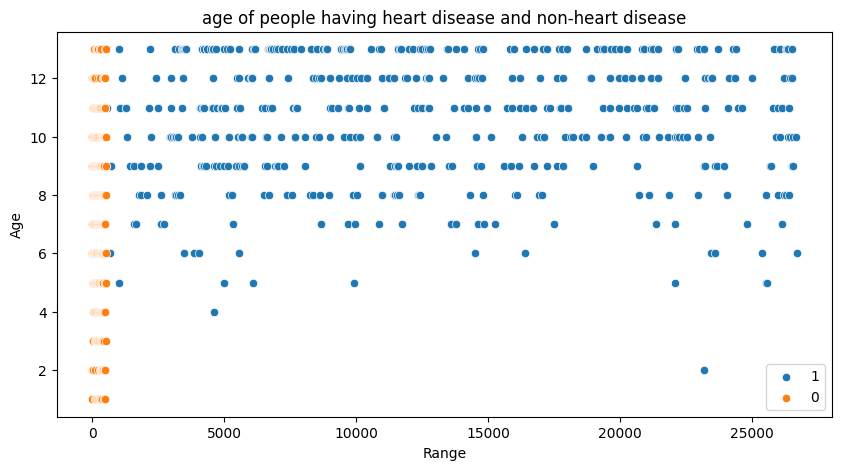

In [9]:

plt.figure(figsize=(10,5))

data0=data[data['HeartDiseaseorAttack']==0.0]

data1=data[data['HeartDiseaseorAttack']==1.0]



sns.scatterplot(data1['Age'].head(500),label="1")
sns.scatterplot(data0['Age'].head(500),label="0")



plt.title("age of people having heart disease and non-heart disease")

plt.ylabel("Age")

plt.xlabel("Range")

plt.show()


Text(0.5, 1.0, 'disease')

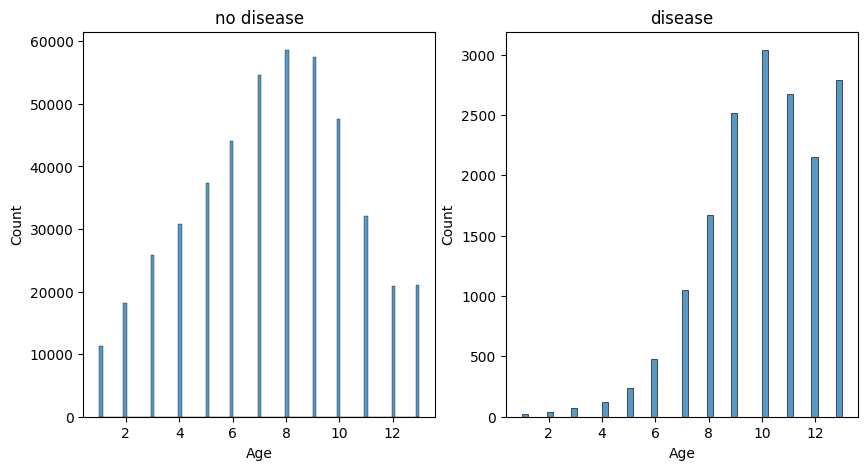

In [10]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.histplot(ax=axes[0],x=data0['Age'])
sns.histplot(ax=axes[1],x=data1["Age"])
axes[0].set_title("no disease")
axes[1].set_title("disease")

1.0    12189
0.0     4674
Name: Sex, dtype: int64


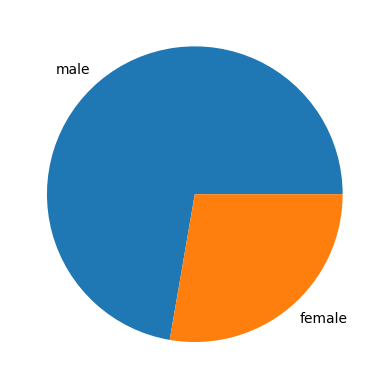

In [11]:
print(data1['Sex'].value_counts())

l=list((data1['Sex'].value_counts()))
l


plt.pie(l,labels=['male','female'])


plt.show()

(476586, 26)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


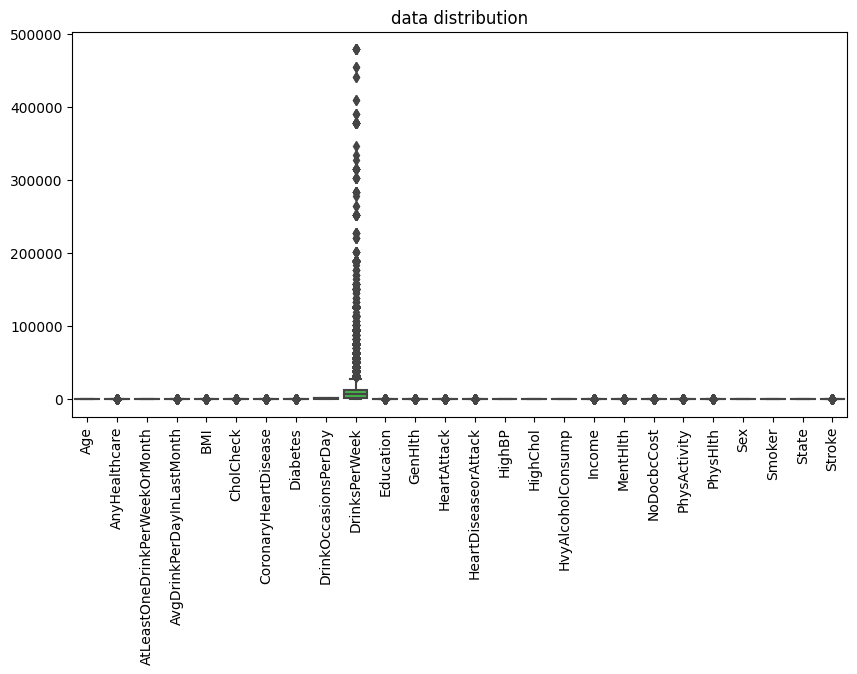

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data)
print(data.shape)
l=list(np.arange(26))
print(l)
plt.title("data distribution")
plt.xticks(l, list(data.columns),
       rotation=90)
plt.show()

#TRANING MODEL¶


In [14]:
y=data[['HeartDiseaseorAttack']]


x=data.drop('HeartDiseaseorAttack',axis=1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


model=StandardScaler()

new_data=model.fit_transform(x_test)

x_test=pd.DataFrame(new_data)
                    
                    
new_data=model.fit_transform(x_train)

x_train=pd.DataFrame(new_data)                    
                    

(476586, 26)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


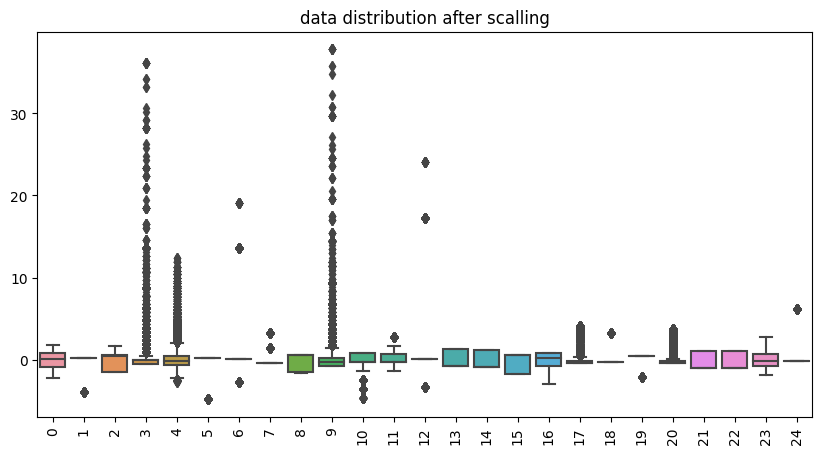

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train)
print(data.shape)
l=list(np.arange(25))
print(l)
plt.title("data distribution after scalling")
plt.xticks(l, list(x_train.columns),
       rotation=90)
plt.show()

#LOGISTIC *REGRESSION¶*


In [18]:

import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


model=LogisticRegression()


model.fit(x_train,y_train)


print(model.score(x_test,y_test))


pred=model.predict(x_test)

0.9993495457311315


In [19]:
confusion_matrix(y_test,pred)

array([[91957,     0],
       [   62,  3299]])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91957
         1.0       1.00      0.98      0.99      3361

    accuracy                           1.00     95318
   macro avg       1.00      0.99      1.00     95318
weighted avg       1.00      1.00      1.00     95318



Text(0.5, 1.0, 'roc curve')

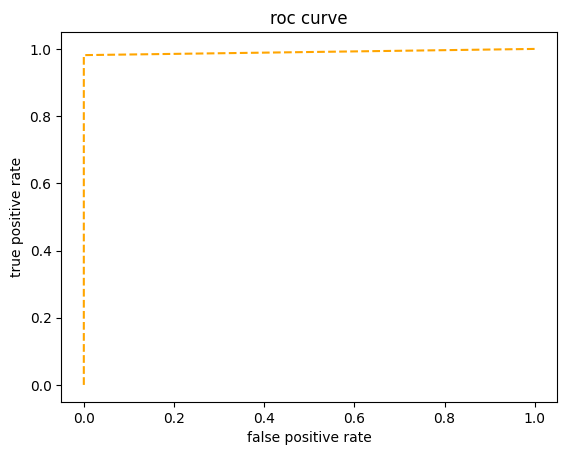

In [21]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")

#DECISION TREE¶


In [22]:

from sklearn.tree import DecisionTreeClassifier


model=DecisionTreeClassifier()


model.fit(x_train,y_train)

print(model.score(x_test,y_test))

pred1=model.predict(x_test)

1.0


In [23]:
confusion_matrix(y_test,pred1)

array([[91957,     0],
       [    0,  3361]])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91957
         1.0       1.00      1.00      1.00      3361

    accuracy                           1.00     95318
   macro avg       1.00      1.00      1.00     95318
weighted avg       1.00      1.00      1.00     95318



Text(0.5, 1.0, 'roc curve')

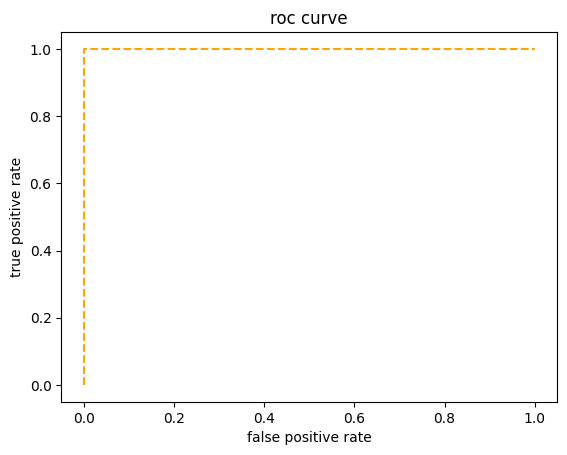

In [25]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred1, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")

#RANDOM *FOREST¶*


In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


model.fit(x_train,y_train)


print(model.score(x_test,y_test))


pred2=model.predict(x_test)

1.0


Text(0.5, 1.0, 'roc curve')

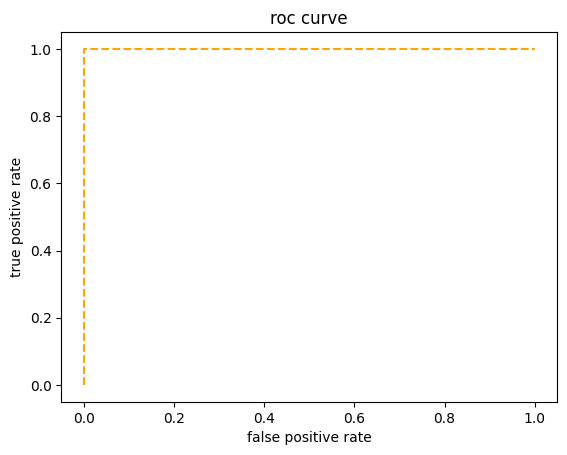

In [27]:
pred2=model.predict(x_test)


from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred2, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")



#KNeighborsClassifier



In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9981745315680144

Text(0.5, 1.0, 'roc curve')

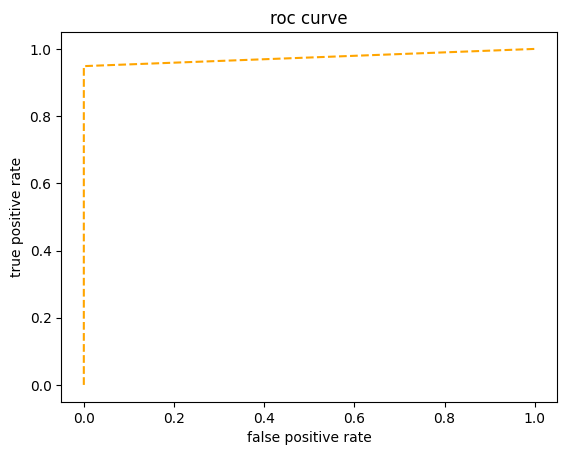

In [29]:
pred2=model.predict(x_test)


from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred2, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title("roc curve")